In [1]:
mod_input=True
mod_topo=True
leak_rate = 0.2
gradient= 0.00075# 0.0005
gain = 1.85 # if breadth is different from 600 change from 1.75  600:1.75    800;1.25    400:1.85
radical=False
radical_bis=False
grad2=1.25
breadth=600
expon=3

reservoir_reps=10

remove_stop_words = False
do_shuffle = False


if do_shuffle:
    intact_status_txt = "shuffled"
else:
    intact_status_txt = "intact"

print(intact_status_txt)
# baseline with slow leak rate

intact


In [3]:
import os
create_directories = True
if create_directories:
    os.mkdir("c:/widths_nat_txt_data")               #main dir
    os.mkdir("c:/widths_nat_txt_data/%d" % breadth)               #main dir

    for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s" % (breadth,nar_text))               #main dir
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/intact" % (breadth,nar_text))        #intact subdir
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/intact/data" % (breadth,nar_text))
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/intact/figures" % (breadth,nar_text))
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/shuffled" % (breadth,nar_text))        #intact subdir
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/shuffled/data" % (breadth,nar_text))
        os.mkdir("c:/widths_nat_txt_data/%d/nat_nar_%s/shuffled/figures" % (breadth,nar_text))
   

In [4]:
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import pylab
#import statsmodels.api as sm

#import seaborn as sns

#import csv

#import scipy
#from scipy import stats
#from scipy.ndimage import gaussian_filter1d

import random


In [5]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords


vectorDim = 100

numNode = 1000

#inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
#outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')
#print(len(inputDataTraining))
#print(len(outputDataTraining))

Using Numpy backend.


In [6]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [7]:
#reservoirStatesBuffer[:,:resn]

#in_small = inputDataTraining[:10000]
#out_small = outputDataTraining[:10000]


#np.save('in_small.npy', in_small)
#np.save('out_small.npy', out_small)

in_small = np.load('G:/Mon Drive/GoogleWIP/Projects/NIR-PCB2021/in_small.npy')
out_small = np.load('G:/Mon Drive/GoogleWIP/Projects/NIR-PCB2021/out_small.npy')

print(len(in_small))
print(len(out_small))

10000
10000


In [8]:
#wiki2vec = Wikipedia2Vec.load('C:/Users/PeterDell/Google Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/enwiki_20180420_100d.pkl')
wiki2vec = Wikipedia2Vec.load('C:/users/peter/downloads/enwiki_20180420_100d.pkl')


In [9]:
temp_W=np.zeros([1000,1000])

In [15]:
for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
    current_file = "G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/%s_transcript.txt" % (nar_text)
    print(current_file)
    
    
    
    
    # here we read the text, run the reservoir - will do this twice for intact and scrambled

    #read in the narrative

    huge_list = []

    #with open("my_file_Gatsby_Kane_wolfe_bond.txt", "r") as f:
    #    huge_list = f.read().split()::::"iss_gatsby_long.txt"
    with open(current_file, "r", encoding="utf8") as f:
        huge_list = f.read().split()


    #print(huge_list)   

    discourse_words = huge_list
    del discourse_words[2500:]

    # clean it up
    # large capital -> small capital

    discourse_words = [s.replace(s, s.lower()) for s in discourse_words]

        # remove '.' and ',' from word list
    discourse_words = [s.replace('.', '') for s in discourse_words]
    discourse_words = [s.replace(',', '') for s in discourse_words]


    if remove_stop_words:
        # remove stop words from word list
        stop_words = stopwords.words('english')
        #print(stop_words)
        for stop_word in stop_words:
            while stop_word in discourse_words :
                discourse_words.remove(stop_word)


        # remove "'s" and "'" and "-" and "'d" and "'ll" and "'ve" and "re" from word list
    discourse_words = [s.replace("'s", '') for s in discourse_words]
    discourse_words = [s.replace("’s", '') for s in discourse_words]
    discourse_words = [s.replace("'", '') for s in discourse_words]
    discourse_words = [s.replace("-", ' ') for s in discourse_words]
    discourse_words = [s.replace("'d", '') for s in discourse_words]
    discourse_words = [s.replace("'ll", '') for s in discourse_words]
    discourse_words = [s.replace("'ve", '') for s in discourse_words]
    discourse_words = [s.replace("'re", '') for s in discourse_words]
    discourse_words = [s.replace("'m", '') for s in discourse_words]
    discourse_words = [s.replace("(", '') for s in discourse_words]
    discourse_words = [s.replace(")", '') for s in discourse_words]
    discourse_words = [s.replace("[", '') for s in discourse_words]
    discourse_words = [s.replace("]", '') for s in discourse_words]
    discourse_words = [s.replace(",", '') for s in discourse_words]
    discourse_words = [s.replace(";", '') for s in discourse_words]
    discourse_words = [s.replace("-", '') for s in discourse_words]
    discourse_words = [s.replace(":", '') for s in discourse_words]
    discourse_words = [s.replace("?", '') for s in discourse_words]
    discourse_words = [s.replace("!", '') for s in discourse_words]
    discourse_words = [s.replace("!", '') for s in discourse_words]




    #
    #print(discourse_words)
    if do_shuffle:
        random.shuffle(discourse_words)


    inputDataTesting = np.empty((0,vectorDim))
    print(inputDataTesting.shape)


    for num in range(len(discourse_words)):
        if wiki2vec.get_word(discourse_words[num]):
            inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
            print(discourse_words[num], num, end = ' ')
    print(inputDataTesting.shape)    
    
    
###################################################################

##########   now run the reservoirs for each of the input texts

    for res_seed in range(reservoir_reps):
    # set the seed
        np.random.seed(res_seed)

        # set up the reservoir
        # leakingRate=0.2 changing too fast, mutliple with 0.05; changed
        esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=leak_rate, regressionParameters=[1e-2], solver="lsqr", feedback=False)

        # train the reervoir with a new seed
        esn.fit(in_small, out_small, transientTime="Auto", verbose=1)



        # modify the reservoir topology for input
        if mod_input:
            for i in range(700):
                for j in range(101):
                    esn._WInput[i+300,j] = 0
            esn._WInput=esn._WInput*5

        #radical _W modification
        if mod_topo:
            for i in range(1000):
                for j in range(1000):
                    temp_W[i,j] = esn._W[i,j]
            for i in range(1000):
                for j in range(1000):
                    esn._W[i,j]=0
            for i in range(esn._W.shape[0]):
                for j in range(esn._W.shape[1]):
                    if abs(i-j) <= breadth:
                        esn._W[i,j] = ((breadth-abs(i-j))/breadth)**expon*temp_W[i,j]* (1 + i * gradient)*gain
        if radical:
            for i in range(100,200):
                for j in range(800,900):
                    esn._W[j,i] = temp_W[j,i]*grad2

        if radical_bis:
            for i in range(100,200):
                for j in range(800,900):
                    esn._W[i,j] = temp_W[j,i]*grad2


        #run the reservoir
        reservoirStatesBuffer = np.empty((0,numNode))
        prediction,reservoirStatesBuffer  = esn.predict(inputDataTesting)
        reservoirStatesBuffer = reservoirStatesBuffer.T
        print(reservoirStatesBuffer.shape)
        reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
        print(reservoirStatesBuffer.shape)
        print(prediction.shape)

        # set the similarity matrix
        sim_matrix1 = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])

        print(len(reservoirStatesBuffer[1]))

        reservoirStatesBuffer1 = reservoirStatesBuffer

        file_string = "c:/widths_nat_txt_data/%s/nat_nar_%s/%s/data/nat_nar_%s_%s_%d.npy" % (breadth,nar_text,intact_status_txt,nar_text,intact_status_txt,res_seed)
        print("saving file", file_string)
        np.save(file_string,reservoirStatesBuffer)

        #plot figure to verigy
        resn = 50
        begin=0
        end=2200
        rbegin = 900
        rend = 910
        fig= plt.figure(figsize=(10,12))

        #fig.suptitle("%s_%s_%d" % (nar_text,intact_status_txt,res_seed))
        fig.suptitle("breadth%d_nat_nar_%s_%s_seed_%d" % (breadth,nar_text,intact_status_txt,res_seed))

        plt.subplot(611)
        plt.plot( reservoirStatesBuffer1[begin:end,100:105])
        plt.title('Hierarchical 100:105')

        plt.subplot(612)
        plt.plot( reservoirStatesBuffer1[begin:end,300:305])
        plt.title('Hierarchical 300:305')

        plt.subplot(613)
        plt.plot( reservoirStatesBuffer1[begin:end,500:505])
        plt.title('Hierarchical 500:505')

        plt.subplot(614)
        plt.plot( reservoirStatesBuffer1[begin:end,700:705])
        plt.title('Hierarchical 700:705')

        plt.subplot(615)
        plt.plot( reservoirStatesBuffer1[begin:end,900:905])
        plt.title('Hierarchical 900:905')

        plt.subplot(616)
        plt.plot( inputDataTesting[begin:end,:])
        plt.title('Input')

        #fig.tight_layout()
        plt.savefig("c:/widths_nat_txt_data/%s/nat_nar_%s/%s/figures/nat_nar_%s_%s_%d.png" % (breadth,nar_text,intact_status_txt,nar_text,intact_status_txt,res_seed))
        #plt.savefig("multi_txt_data/%s/%s/figures/%s_%s_%d.png" % (nar_text,intact_status_txt,nar_text,intact_status_txt,res_seed))
        plt.close('all')    


G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/sherlock_transcript.txt
(0, 100)


okay 0 so 1 they 2 began 3 with 4 like 5 a 6 dream 7 sequence 8 of 9 um 10 a 11 shootout 12 it 13 during 14 the 15 day 16 it 17 looks 18 like 19 its 20 in 21 a 22 grassy 23 field 24 with 25 some 26 sort 27 of 28 disheveled 29 like 30 half 31 decomposed 32 building 33 um 34 there 35 a 36 lot 37 of 38 guys 39 in 40 army 41 gear 42 um 43 shooting 44 it 45 very 46 chaotic 47 cant 48 really 49 make 50 out 51 any 52 faces 53 or 54 really 55 people 56 um 57 and 58 then 59 so 60 that 61 uh 62 cuts 63 out 64 really 65 quickly 66 and 67 you 68 see 69 this 70 man 71 kind 72 of 73 like 74 start 75 out 76 of 77 the 78 bed 79 it 80 dark 81 looks 82 like 83 it 84 the 85 middle 86 of 87 the 88 night 89 or 90 something 91 and 92 um 93 so 94 he 95 just 96 kind 97 of 98 sits 99 up 100 and 101 like 102 sits 103 there 104 like 105 heaving 106 for 107 a 108 while 109 like 110 he 111 just 112 woke 113 up 114 from 115 a 116 nightmare 117 which 118 is 119 what 120 we 121 assume 122 that 123 dream 124 was 125 u

the 1732 kitchen 1733 a 1734 mess 1735 it 1736 looks 1737 like 1738 there 1739 lots 1740 of 1741 like 1742 chemistry 1743 lab 1744 equipment 1745 on 1746 there 1747 um 1748 but 1749 yeah 1750 so 1751 then 1752 uh 1753 they 1754 go 1755 into 1756 there 1757 and 1758 then 1759 there 1760 they 1761 talk 1762 for 1763 a 1764 little 1765 bit 1766 um 1767 sherlock 1768 uh 1769 he 1770 he 1771 makes 1772 some 1773 comments 1774 about 1775 to 1776 um 1777 his 1778 landlady 1779 about 1780 um 1781 having 1782 her 1783 make 1784 him 1785 tea 1786 or 1787 clean 1788 up 1789 the 1790 kitchen 1791 or 1792 something 1793 along 1794 those 1795 lines 1796 and 1797 she 1798 kind 1799 of 1800 protesting 1801 am 1803 not 1804 like 1805 a 1806 housekeeper 1807 the 1809 landlord 1810 but 1812 um 1813 yeah 1814 he 1815 they 1816 uh 1817 talk 1818 about 1819 the 1820 three 1821 linked 1822 suicides 1823 i 1824 believe 1825 prompted 1826 by 1827 a 1828 newspaper 1829 and 1830 then 1831 uh 1832 while 1833 talk

100% (9904 of 9904) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2401, 1101)
(2401, 1000)
(2401, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_sherlock/intact/data/nat_nar_sherlock_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/merlin_transcript.txt
(0, 100)


okay 0 um 1 so 2 the 3 thing 4 starts 5 with 6 like 7 this 8 kind 9 of 10 beachy 11 scene 12 almost 13 with 14 sand 15 and 16 then 17 you 18 see 19 this 20 kid 21 merlin 22 start 23 walking 24 up 25 and 26 it 27 flashes 28 through 29 a 30 bunch 31 of 32 like 33 scenes 34 of 35 just 36 traveling 37 like 38 in 39 fairly 40 rural 41 areas 42 and 43 the 44 music 45 upbeat 46 and 47 happy 48 and 49 then 50 um 51 like 52 the 53 title 54 scene 55 the 56 credits 57 roll 58 with 59 the 60 music 61 and 62 you 63 see 64 like 65 a 66 bunch 67 of 68 like 69 medieval 70 imagery 71 and 72 fire 73 and 74 stuff 75 um 76 so 77 then 78 after 79 that 80 uh 81 this 82 kid 83 just 84 keeps 85 walking 86 he 87 now 88 in 89 a 90 town 91 with 92 like 93 lots 94 of 95 people 96 um 97 it 98 very 99 obviously 100 like 101 medieval 102 times 103 uh 104 he 105 got 106 like 107 this 108 backpack 109 and 110 stuff 111 and 112 he 113 traveled 114 a 115 long 116 way 117 um 118 we 119 understand 120 so 121 um 122 everyo

conversation 1796 with 1797 the 1798 uh 1799 court 1800 physician 1801 we 1802 learn 1803 that 1804 there 1805 uh 1806 all 1807 the 1808 dragons 1809 had 1810 been 1811 killed 1812 twenty 1813 years 1814 ago 1815 because 1816 magic 1817 like 1818 sent 1819 this 1820 world 1821 into 1822 chaos 1823 except 1824 for 1825 one 1826 which 1827 is 1828 underneath 1829 the 1830 castle 1831 um 1832 so 1833 there 1834 a 1835 bit 1836 of 1837 foreshadowing 1838 um 1839 and 1840 then 1841 so 1842 merlin 1843 bumps 1844 into 1845 arthur 1846 and 1847 his 1848 gang 1849 on 1850 the 1851 street 1852 again 1853 and 1854 um 1855 at 1856 first 1857 when 1858 arthur 1859 calls 1860 out 1861 to 1862 him 1863 he 1864 tries 1865 to 1866 ignore 1867 them 1868 but 1869 then 1870 arthur 1871 just 1872 keeps 1873 talking 1874 and 1875 he 1876 ignore 1878 him 1879 anymore 1880 and 1881 then 1882 so 1883 um 1884 he 1885 um 1886 he 1887 being 1888 merlin 1889 uh 1890 keeps 1891 like 1892 kind 1893 of 1894 over 189

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2223, 1101)
(2223, 1000)
(2223, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_merlin/intact/data/nat_nar_merlin_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/pieman_transcript.txt
(0, 100)
i 0 began 1 my 2 illustrious 3 career 4 in 5 journalism 6 in 7 the 8 bronx 9 where 10 i 11 toiled 12 as 13 a 14 reporter 16 for 17 the 18 ram 19 the 20 student 21 newspaper 22 at 23 fordham 24 university 25 and 26 one 27 day 28 walking 30 toward 31 the 32 campus 33 center 34 and 35 out 36 comes 37 the 38 elusive 39 dean 40 mcgowan 41 architect 42 of 43 a 44 policy 45 to 46 replace 47 fordham 48 traditionally 49 to 51 students 53 with 54 wealthier 55 more 56 prestigious 57 ones 58 so 59 i 60 whip 61 out 62 my 63 notebook 64 and 65 i 66 go 67 up 68 to 69 him 70 and 71 i 72 say 73 mcgowan 75 is 76 it 77 true 78 that 79 fordham 80 university 81 plans 82 to 83 raise 84 tuition 85 substantially 86 above 87 the 88 inflation 89 rate 90 and 91 if 92 so 93 that

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(895, 1101)
(895, 1000)
(895, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_pieman/intact/data/nat_nar_pieman_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/black_transcript.txt
(0, 100)


so 0 i 1 was 2 a 3 junior 4 in 5 college 6 when 7 i 8 got 9 my 10 first 11 paying 12 in 13 my 14 field 15 on 16 the 17 radio 18 this 19 is 20 not 21 an 22 internship 23 im 24 getting 25 a 26 check 27 it 28 was 29 a 30 country 31 and 32 western 33 radio 34 station 35 and 36 my 37 job 38 though 39 it 40 was 41 only 42 on 43 the 44 weekends 45 was 46 to 47 play 48 the 49 top 50 country 51 hits 52 of 53 the 54 week 55 each 56 sunday 57 it 58 actually 59 came 60 on 61 an 62 album 63 so 65 i 66 had 67 to 68 take 69 it 70 out 71 of 72 the 73 sleeve 74 and 75 put 76 it 77 on 78 the 79 turntable 80 just 81 so 82 and 83 put 84 the 85 needle 86 down 87 on 88 side 89 one 90 caring 91 not 92 to 93 scratch 94 it 95 and 96 then 97 let 98 part 99 one 100 play 101 my 102 moment 103 is 104 coming 105 now 106 yes 107 all 108 the 109 training 110 it 111 coming 112 now 113 when 114 side 115 one 116 would 117 end 118 i 119 had 120 to 121 lift 122 the 123 needle 124 and 125 here 126 my 127 moment 128 i 129 g

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1486, 1101)
(1486, 1000)
(1486, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_black/intact/data/nat_nar_black_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/forgot_transcript.txt
(0, 100)


this 0 is 1 a 2 story 3 that 4 i 5 wrote 6 called 7 the 8 man 9 who 10 forgot 11 ray 12 bradbury 13 and 14 i 15 wrote 16 it 17 as 18 a 19 birthday 20 present 21 for 22 ray 23 on 24 his 25 91st 26 birthday 27 it 28 begins 29 like 30 this 31 i 32 am 33 forgetting 34 things 35 which 36 scares 37 me 38 i 39 am 40 losing 41 words 42 although 43 im 44 not 45 losing 46 concepts 47 i 48 hope 49 that 50 im 51 not 52 losing 53 concepts 54 if 55 i 56 am 57 losing 58 concepts 59 i 60 am 61 not 62 aware 63 of 64 it 65 if 66 i 67 am 68 losing 69 concepts 70 how 71 would 72 i 73 know 74 which 75 is 76 funny 77 because 78 my 79 memory 80 was 81 always 82 so 83 good 84 everything 85 was 86 in 87 there 88 sometimes 89 my 90 memory 91 was 92 so 93 good 94 that 95 i 96 even 97 thought 98 that 99 i 100 could 101 remember 102 things 103 i 104 didnt 105 know 106 yet 107 remembering 108 forward 109 i 110 dont 111 think 112 there 113 a 114 word 115 for 116 that 117 is 118 there 119 remembering 120 things 121 t

he 1750 cant 1751 be 1752 expected 1753 to 1754 remember 1755 everything 1756 god 1757 cant 1758 busy 1759 chap 1760 so 1761 perhaps 1762 he 1763 delegates 1764 things 1765 sometimes 1766 just 1767 goes 1768 i 1770 want 1771 you 1772 to 1773 remember 1774 the 1775 dates 1776 of 1777 the 1778 hundred 1779 years 1780 war 1781 and 1782 you 1783 you 1784 remember 1785 you 1788 remember 1789 jack 1790 benny 1791 who 1792 was 1793 benjamin 1794 kubelsky 1795 from 1796 waukegan 1797 and 1799 then 1800 when 1801 you 1802 forget 1803 the 1804 thing 1805 that 1806 god 1807 has 1808 charged 1809 you 1810 with 1811 remembering 1812 bam 1813 no 1814 more 1815 okapi 1816 just 1817 an 1818 okapi 1819 shaped 1820 hole 1821 in 1822 the 1823 world 1824 which 1825 is 1826 halfway 1827 between 1828 an 1829 antelope 1830 and 1831 a 1832 giraffe 1833 no 1834 more 1835 jack 1836 benny 1837 no 1838 more 1839 waukegan 1840 just 1841 a 1842 hole 1843 in 1844 your 1845 mind 1846 where 1847 a 1848 person 1849 or 

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2118, 1101)
(2118, 1000)
(2118, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_forgot/intact/data/nat_nar_forgot_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/21styear_transcript.txt
(0, 100)


this 0 is 1 los 2 angeles 3 and 4 it 5 the 6 height 7 of 8 summer 9 in 10 a 11 small 12 bungalow 13 off 14 of 15 la 16 cienega 17 clara 18 serves 19 homemade 20 chili 21 and 22 chips 23 in 24 red 25 plastic 26 bowls 27 wine 29 in 30 blue 31 plastic 32 the 33 colors 34 dont 35 match 36 and 37 the 38 cups 39 are 40 too 41 big 42 to 43 serve 44 wine 45 didnt 47 get 48 half 49 the 50 things 51 on 52 my 53 she 55 hisses 56 at 57 gary 58 as 59 he 60 passes 61 he 62 shrugs 63 no 64 one 65 seems 66 to 67 mind 68 but 69 her 70 you 72 have 73 to 74 buy 75 a 76 dollar 78 bottle 79 of 80 gary 82 waves 83 away 84 her 85 upset 86 he 87 seems 88 distracted 89 guilty 90 of 91 something 92 she 93 can 94 tell 95 by 96 the 97 way 98 he 99 avoids 100 her 101 clara 102 looks 103 at 104 her 105 face 106 in 107 the 108 hallway 109 mirror 110 she 111 years 113 old 114 she 115 slowly 116 getting 117 white 118 hairs 119 in 120 her 121 eyebrows 122 she 123 feels 124 completely 125 alone 126 grad 127 students 128

tupperware 1935 on 1936 the 1937 mail 1938 table 1939 and 1940 forgets 1941 it 1942 she 1943 doesnt 1944 remind 1945 him 1946 the 1947 door 1948 closes 1949 she 1950 stares 1951 at 1952 it 1953 next 1954 to 1955 the 1956 tupperware 1957 she 1958 sees 1959 the 1960 envelope 1961 from 1962 american 1963 express 1964 gary 1965 business 1966 account 1967 she 1968 takes 1969 his 1970 lunch 1971 and 1972 tosses 1973 it 1974 in 1975 the 1976 trash 1977 whole 1978 tupperware 1979 then 1980 picks 1981 it 1982 out 1983 opens 1984 it 1985 tries 1986 it 1987 cold 1988 chili 1989 her 1990 eyes 1991 find 1992 his 1993 wallet 1994 right 1995 by 1996 the 1997 couch 1998 dollars 2000 for 2001 scotch 2002 she 2003 shoves 2004 chili 2005 in 2006 her 2007 mouth 2008 without 2009 stopping 2010 is 2011 new 2012 york 2013 worth 2014 the 2015 fight 2016 every 2017 bit 2018 of 2019 bean 2020 every 2021 bit 2022 of 2023 rice 2024 it 2025 all 2026 comfort 2027 now 2028 and 2029 then 2030 it 2032 all 2033 guilt 2

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(2272, 1101)
(2272, 1000)
(2272, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_21styear/intact/data/nat_nar_21styear_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/bronx_transcript.txt
(0, 100)


when 0 i 1 get 2 the 3 baton 4 to 5 run 6 the 7 anchor 8 leg 9 of 10 the 11 distance 12 medley 13 a 15 race 16 you 17 run 18 on 19 a 20 five 22 yards 23 behind 24 vince 25 mutarelli 26 this 27 race 28 is 29 over 30 you 31 could 32 have 33 a 34 lead 36 on 37 vince 38 mutarelli 39 and 40 over 41 the 42 course 43 of 44 a 45 mile 46 he 47 would 48 reel 49 you 50 in 51 he 52 would 53 pass 54 you 55 and 56 he 57 would 58 win 59 he 60 is 61 the 62 best 63 high 64 school 65 middle 66 distance 67 runner 68 in 69 the 70 northeast 71 united 72 states 73 his 74 nickname 75 is 76 la 77 machine 78 because 79 he 80 runs 81 like 82 a 83 cyborg 84 and 85 he 86 never 87 gets 88 tired 89 about 91 300 92 people 93 in 94 the 95 stands 96 around 97 the 98 track 99 that 100 knows 102 that 103 he 104 has 105 no 106 chance 107 of 108 being 109 beaten 110 except 111 one 112 guy 113 one 114 guy 115 thinks 116 maybe 117 he 118 can 119 be 120 beaten 121 and 122 that 123 the 124 guy 125 who 126 should 127 know 128 

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


(1305, 1101)
(1305, 1000)
(1305, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_bronx/intact/data/nat_nar_bronx_intact_9.npy
G:/Mon Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/texts/piemanpni_transcript.txt
(0, 100)
i 0 began 1 my 2 illustrious 3 career 4 as 5 a 6 reporter 8 in 9 the 10 bronx 11 where 12 i 13 toiled 14 for 15 the 16 ram 17 uh 18 fordham 19 university 20 student 21 newspaper 22 and 23 one 24 day 25 walking 27 toward 28 the 29 campus 30 center 31 and 32 out 33 comes 34 the 35 elusive 36 dean 37 mcgowan 38 architect 39 of 40 a 41 policy 42 to 43 replace 44 traditionally 46 working 47 to 48 middle 49 class 50 students 51 with 52 wealthier 53 more 54 prestigious 55 ones 56 so 57 i 58 whip 59 out 60 my 61 notebook 62 and 63 i 64 march 65 right 66 up 67 to 68 him 69 i 70 say 71 mcgowan 73 is 74 it 75 true 76 that 77 fordham 78 plans 79 to 80 raise 81 tuition 82 substantially 83 above 84 the 85 inflation 86 rate 87 and 88 if 89 so 90 that 92 be 93 a 94 

100% (9904 of 9904) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_0.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_1.npy


100% (9902 of 9902) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_2.npy


100% (9906 of 9906) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_3.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_4.npy


100% (9908 of 9908) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_5.npy


100% (9905 of 9905) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_6.npy


100% (9903 of 9903) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_7.npy


100% (9901 of 9901) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_8.npy


100% (9910 of 9910) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


(933, 1101)
(933, 1000)
(933, 100)
1000
saving file c:/widths_nat_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_9.npy


In [16]:
file_string = "c:/widths_syn_txt_data/%s/nat_nar_%s/%s/data/nat_nar_%s_%s_%d.npy" % (breadth,nar_text,intact_status_txt,nar_text,intact_status_txt,res_seed)
print("saving file", file_string)


saving file c:/widths_syn_txt_data/600/nat_nar_piemanpni/intact/data/nat_nar_piemanpni_intact_9.npy


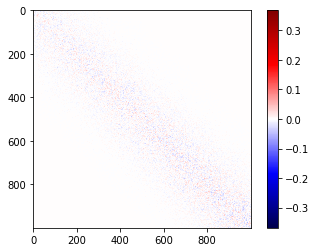

In [17]:
plt.imshow(esn._W,cmap='seismic')
plt.colorbar()

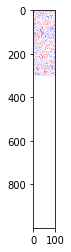

In [18]:
plt.imshow(esn._WInput,cmap='seismic' )

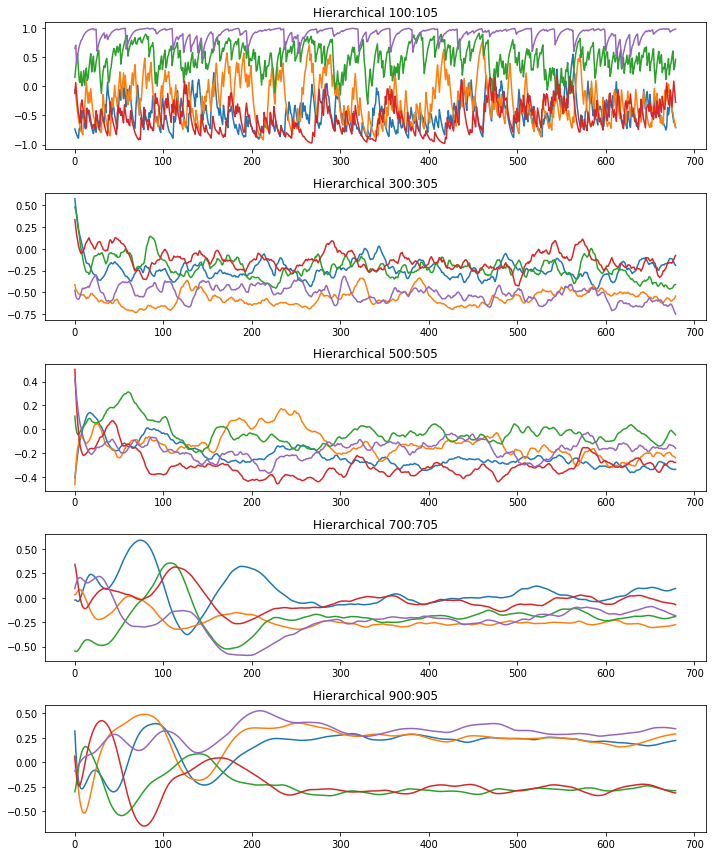

In [19]:
resn = 50
begin=0
end=680
rbegin = 900
rend = 910
fig= plt.figure(figsize=(10,12))

plt.subplot(511)
plt.plot( reservoirStatesBuffer1[begin:end,100:105])
plt.title('Hierarchical 100:105')

plt.subplot(512)
plt.plot( reservoirStatesBuffer1[begin:end,300:305])
plt.title('Hierarchical 300:305')

plt.subplot(513)
plt.plot( reservoirStatesBuffer1[begin:end,500:505])
plt.title('Hierarchical 500:505')

plt.subplot(514)
plt.plot( reservoirStatesBuffer1[begin:end,700:705])
plt.title('Hierarchical 700:705')

plt.subplot(515)
plt.plot( reservoirStatesBuffer1[begin:end,900:905])
plt.title('Hierarchical 900:905')


fig.tight_layout()

#plt.savefig('temporal_hierarchy.png')

In [20]:
print(reservoirStatesBuffer1.shape)

(933, 1000)


In [23]:
reservoirStatesBuffer1.shape

(933, 1000)

In [24]:
areas = 20
factor = int(numNode/areas)
roi_data = np.zeros([areas,reservoirStatesBuffer1.shape[0]])
print(roi_data.shape)
print(factor)

(20, 933)
50


In [25]:
for i in range(areas): # create 10 sub areas
    for j in range (reservoirStatesBuffer1.shape[0]): #for each timestep
        roi_data[i,j] = np.mean(reservoirStatesBuffer1[j,i*factor:(i+1)*factor])

In [26]:
reservoirStatesBuffer1[j,i*factor:(i+1)*factor]

array([ 0.30162612,  0.4023134 ,  0.17777256, -0.56388899, -0.14889235,
        0.10655273,  0.0122448 , -0.0224755 , -0.30327141, -0.22830875,
        0.18003293,  0.29230091,  0.02292112, -0.61567011, -0.45647408,
        0.44167527,  0.01212363, -0.22577211,  0.16686634,  0.32597576,
        0.33835828, -0.46128058, -0.24712556,  0.04673612,  0.09933175,
        0.01673358, -0.17738197, -0.28564657, -0.3886738 ,  0.1913119 ,
       -0.23966993,  0.20071138, -0.54117232,  0.30239935, -0.29073671,
        0.47660381,  0.04949373, -0.35466242, -0.09404724, -0.20850566,
        0.19209086,  0.32296057, -0.17623841,  0.48611333,  0.36126719,
       -0.29881686, -0.0262651 ,  0.04375006, -0.32872438,  0.48295221])

[]

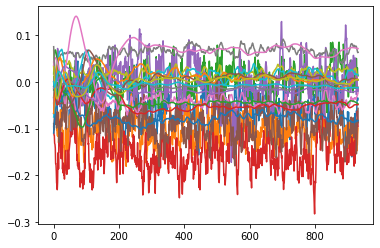

In [27]:
plt.plot(roi_data.T)

plt.plot()

[]

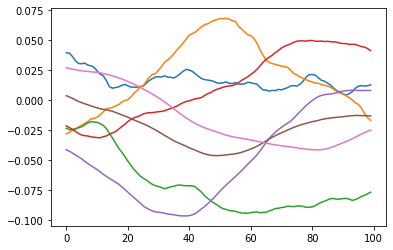

In [28]:
plt.plot(roi_data[8:15,50:150].T)

plt.plot()

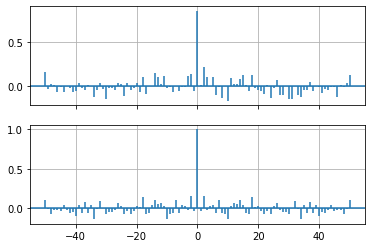

In [31]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(reservoirStatesBuffer1[700,50:150].T, reservoirStatesBuffer1[800,50:150].T, usevlines=True, maxlags=50, normed=True)
ax1.grid(True)

ax2.acorr(reservoirStatesBuffer1[16,50:150].T, usevlines=True, normed=True, maxlags=50)
ax2.grid(True)

plt.show()

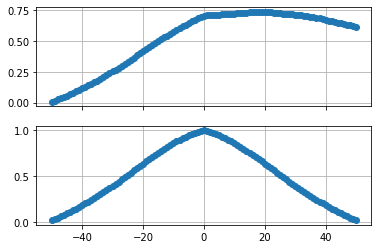

In [32]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(roi_data[7,50:150].T, roi_data[16,50:150].T, usevlines=False, maxlags=50, normed=True)
ax1.grid(True)

ax2.acorr(roi_data[16,50:150].T, usevlines=False, normed=True, maxlags=50)
ax2.grid(True)

plt.show()






In [ ]:
os.mkdir("multi_txt_data")               #main dir
import os
for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
    os.mkdir("multi_txt_data/%s" % (nar_text))               #main dir
    os.mkdir("multi_txt_data/%s/intact" % (nar_text))        #intact subdir
    os.mkdir("multi_txt_data/%s/intact/data" % (nar_text))
    os.mkdir("multi_txt_data/%s/intact/figures" % (nar_text))
    os.mkdir("multi_txt_data/%s/shuffled" % (nar_text))        #intact subdir
    os.mkdir("multi_txt_data/%s/shuffled/data" % (nar_text))
    os.mkdir("multi_txt_data/%s/shuffled/figures" % (nar_text))
   


In [ ]:
if wiki2vec.get_word('qsdfqsdf'):
    print("great")